# Week-1 Assignment

# **Gotta catch 'em all !**

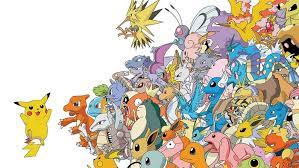

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
#your code here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 2) Read the csv file and assign it to a variable . 

In [2]:
#your code here
df = pd.read_csv('W1_Pokemon.csv')

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [3]:
#your code here
df.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
#your code here
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [5]:
#your code here
df.drop(['#'], axis=1, inplace=True)

### 6) Set the 'Name' column as the index of dataframe

In [6]:
#your code here
df.set_index('Name', inplace=True)

###  7) Print a list of all the unique Type-1 powers

In [7]:
#your code here
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [8]:
#your code here
df['T1+T2']=df['Type 1']+'+'+df['Type 2']

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [9]:
#your code here
# df.index
df[['Mega' in i for i in df.index.values]].index.unique().shape

(49,)

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [10]:
#your code here
round(df['Sp. Def'].std(), 3)

27.829

### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [11]:
#your code here
len(df[df['Legendary']==True])/len(df['Legendary'])*100

8.125

### 4. Name the pokemon(s) with Maximum Defense. 

In [12]:
#your code here
# df['Defense'].describe()
df[df['Defense']==df['Defense'].max()].index

Index(['SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron'], dtype='object', name='Name')

### 5. Which poison pokemon has the strongest attack ?

In [13]:
#your code here
am=df[df['Type 2'] == 'Poison']['Attack'].max()
# print(am)
df[(df['Attack'] == am) & (df['Type 2']=='Poison')]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,T1+T2
Name,,,,,,,,,,,,
BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,Bug+Poison


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

## Flying is the least common type 1 but the second least is Fairy.
## There are total 6 pokemons with type-1 as 'Psychic' and type 2 as 'Flying'.

6

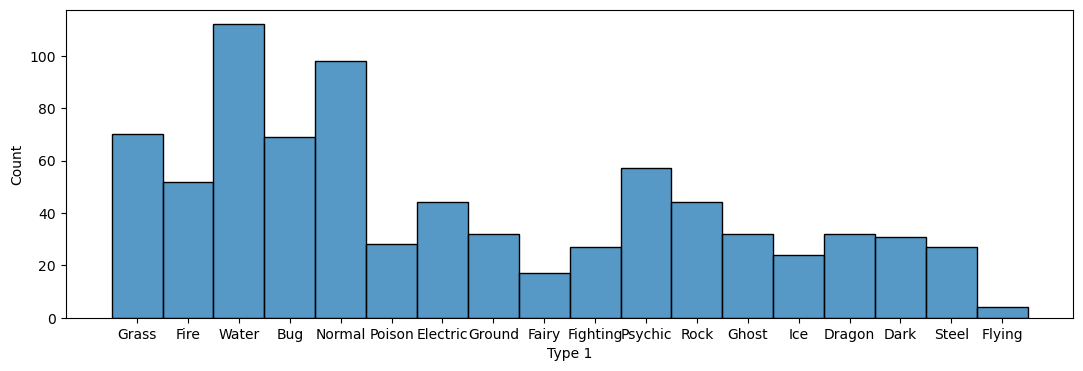

In [14]:
#your code here
plt.figure(figsize=(13,4))
sns.histplot(x="Type 1", data=df)
len(df[(df["Type 1"]=="Psychic") & (df["Type 2"]=="Flying")])

# Fairy is less common Type 2 than Psychic but more common than Steel.

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

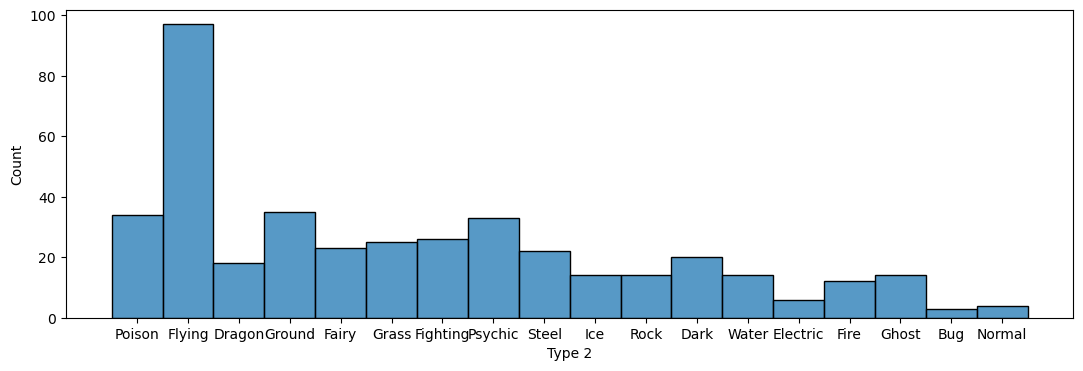

In [15]:
#your code here
plt.figure(figsize=(13,4))
sns.histplot(x="Type 2", data=df)
df["Type 2"].value_counts()

## Generation 4 has more no. of Pokemons than generation 6 but less than that of generation 1.
## Generation 3 has most no. of legendary pokemons.

0    3
Name: Generation, dtype: int64

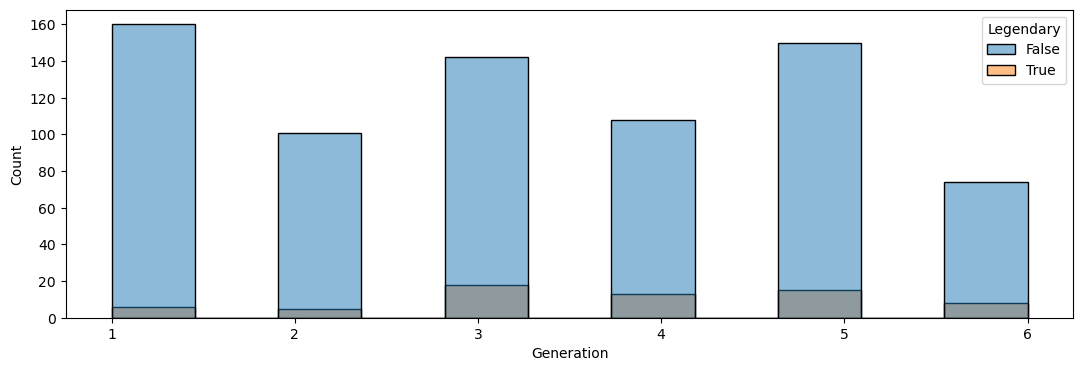

In [16]:
#your code here
plt.figure(figsize=(13,4))
sns.histplot(x="Generation", data=df, hue="Legendary")
df[(df["Legendary"]==True)]["Generation"].mode()

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [17]:
#your code here
df[(df['Legendary']==False) & (df['Type 2']=='Ghost') & (df['Generation']==4)].nlargest(2, 'Speed').index[1]

'Rotom'

### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [18]:
#your code here
ca = df._get_value('Charizard', 'Attack')
cd = df._get_value('Charizard', 'Defense')
len(df[(df['Legendary']==False) & (df['Defense']>cd) & (df['Attack']<ca)])

116


## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [19]:
#your code here
(df['Attack']+df['Sp. Atk']).max()

360

### Which type of legendary pokemons are the most common?

In [20]:
#your code here
df[df['Legendary']==True]['Type 1'].mode()

0    Psychic
Name: Type 1, dtype: object

### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [21]:
#your code here
temp=df[(df['Generation']==6) & (df['Legendary']==True)]['HP'].min()
len(df[(df['Generation']==3) & (df['Legendary']==False) & (df['HP'] > temp)])

95

### Print out the third slowest pokemon(s) in the dataset.

In [22]:
#your code here
temp = df.nlargest(3, 'Speed')['Speed'][2]
df[df['Speed']==temp]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,T1+T2
Name,,,,,,,,,,,,
AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False,NaN
AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False,Rock+Flying
DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,NaN
DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,NaN


### Which pokemon type has the highest average HP?

In [23]:
#your code here
df2 = df.groupby(['Type 1'])
df2.mean().nlargest(1, 'HP')

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Dragon,550.53125,83.3125,112.125,86.375,96.84375,88.84375,83.03125,3.875,0.375
